This is a Sunny port of SpinW tutorial 8, originally authored by Bjorn Fak and Sandor Toth. The goal is to calculate the spin wave spectrum of Antiferromagnetic nearest-neighbour spin chain 

Load packages

In [1]:
using Sunny, GLMakie, CairoMakie 

Build a crystal.

┌ Warning: view_crystal(cryst, max_dist) is deprecated! Use `view_crystal(cryst)` instead. See also optional `ghost_radius` argument.
└ @ PlottingExt /Users/bhushanthipe/.julia/packages/Sunny/lN59K/ext/PlottingExt.jl:660


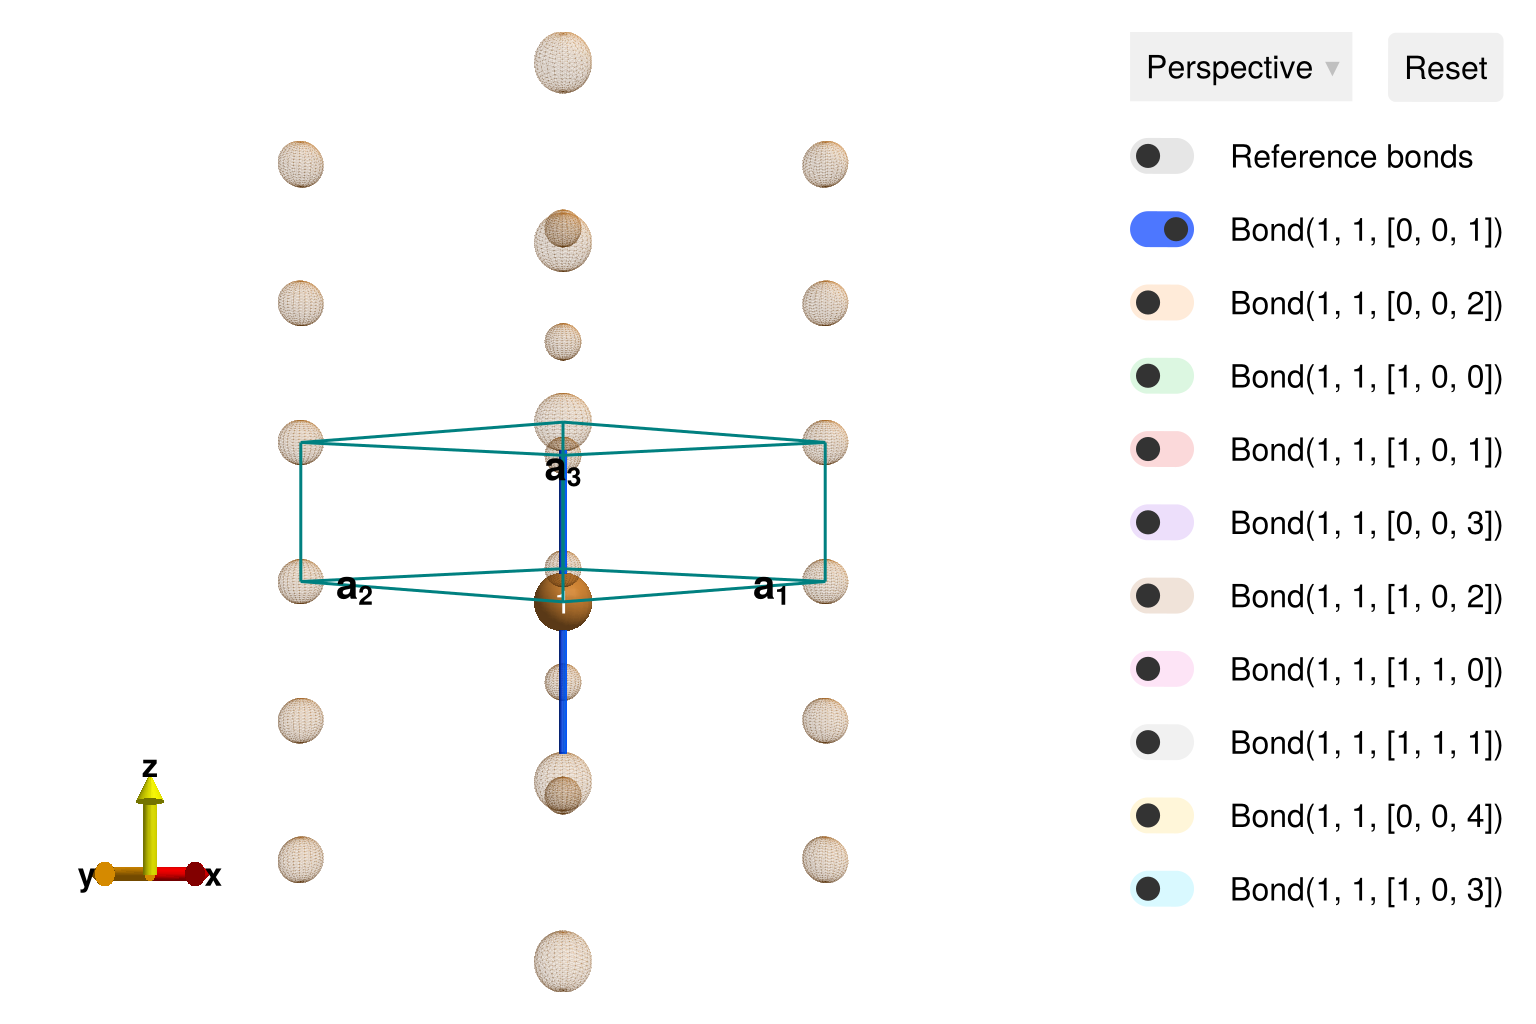

In [2]:
a=8.0
b=8.0
c=3.0
units=Units(:meV)
latvecs = lattice_vectors(a, b, c, 90, 90, 90)
positions=[[0, 0, 0]]
types=["Cu1"]
cryst = Crystal(latvecs, positions; types)
view_crystal(cryst,10)

Create a system with a lattice size (1,1,2). The ordering wave vector is (0,0,1/2) and hence the the magnetic unit cell has 2 sites. The spin is 1.

In [3]:
sys=System(cryst, (1,1,2),[SpinInfo(1,S=1,g=2)], :dipole, seed=0)

System [Dipole mode]
Lattice (1×1×2)×1
Energy per site 0


Set the exchange interations with J=1. PLot the spins after minimizing the energy of the system.

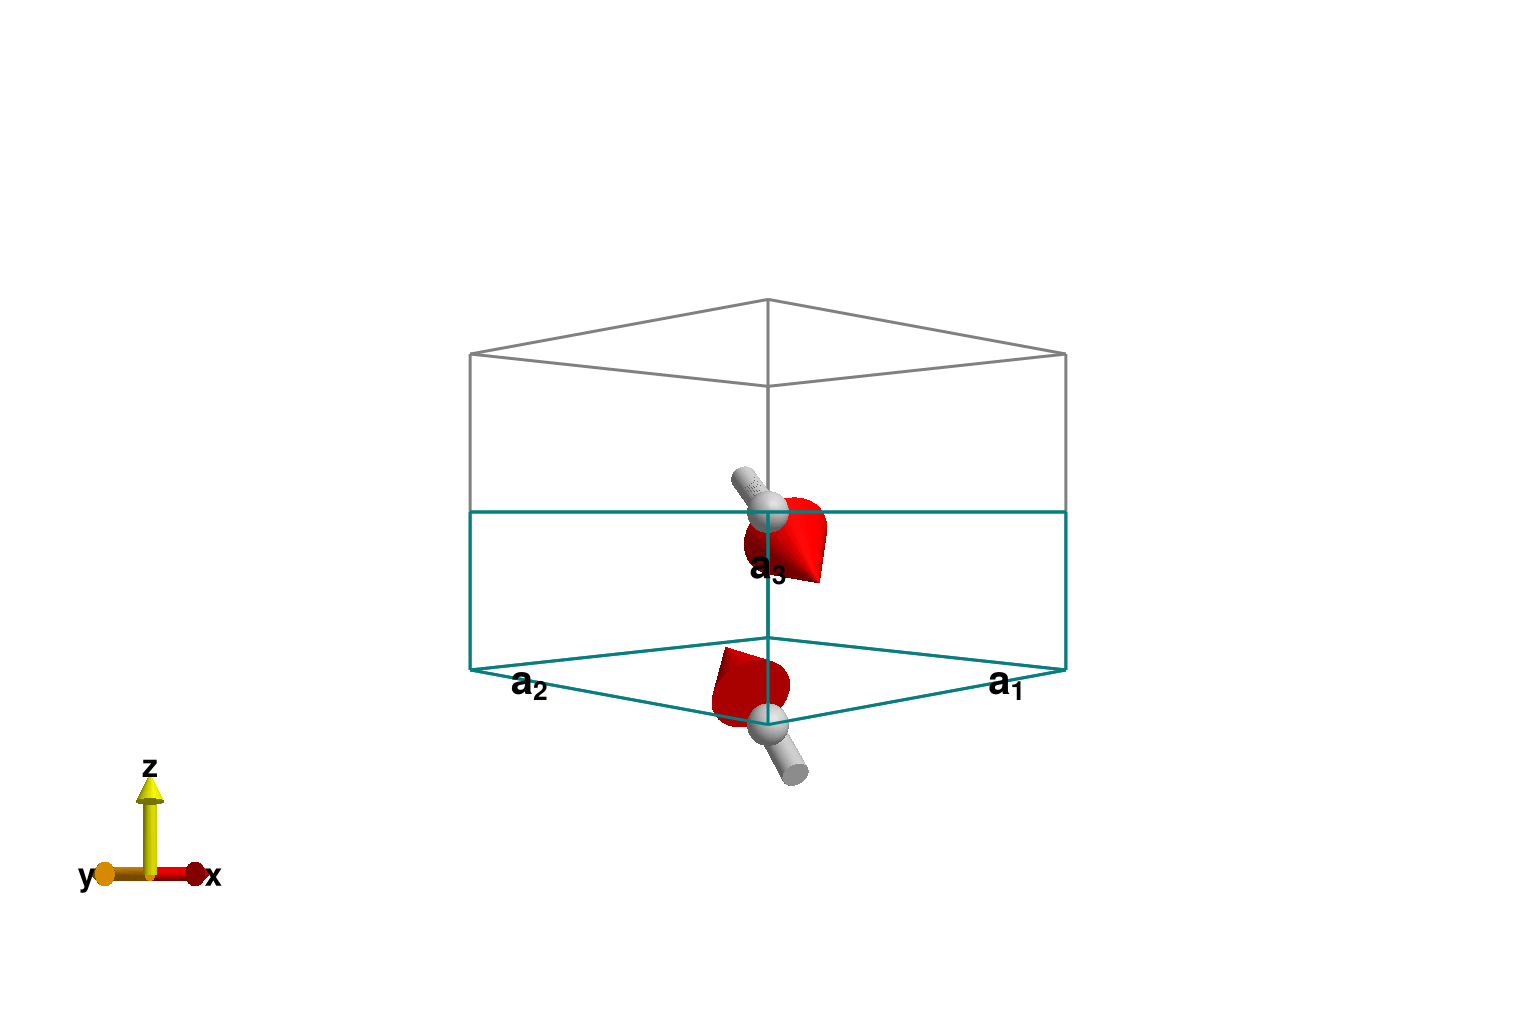

In [4]:
J1=1

set_exchange!(sys,J1,Bond(1, 1, [0, 0, 1]))
randomize_spins!(sys)
minimize_energy!(sys)
plot_spins(sys)

Create a spinw object, set up a path and calculate the dispersion bands and their intensities.

In [5]:
swt=SpinWaveTheory(sys; measure=ssf_perp(sys))
energies = range(0, 2.5, 400)

q_points = [[0,0,0],[0,0,1]]
density = 400
path = q_space_path(cryst, q_points, density);
res=intensities_bands(swt, path)

Sunny.BandIntensities{Float64} (2×400 elements)

Plot the spin wave spectrum

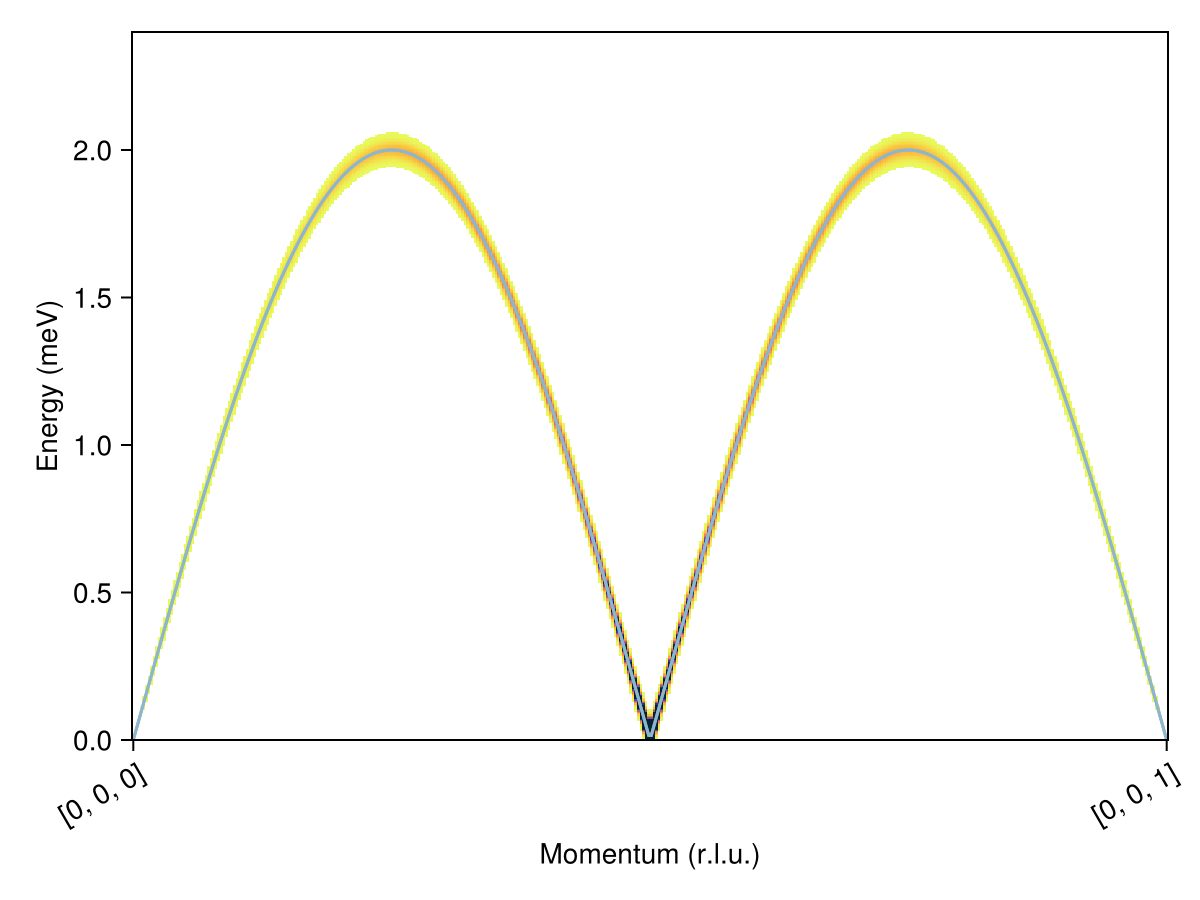

In [11]:
CairoMakie.activate!()
Sunny.BandIntensities{Float64};
plot_intensities(res; units)


Spin-spin correlation

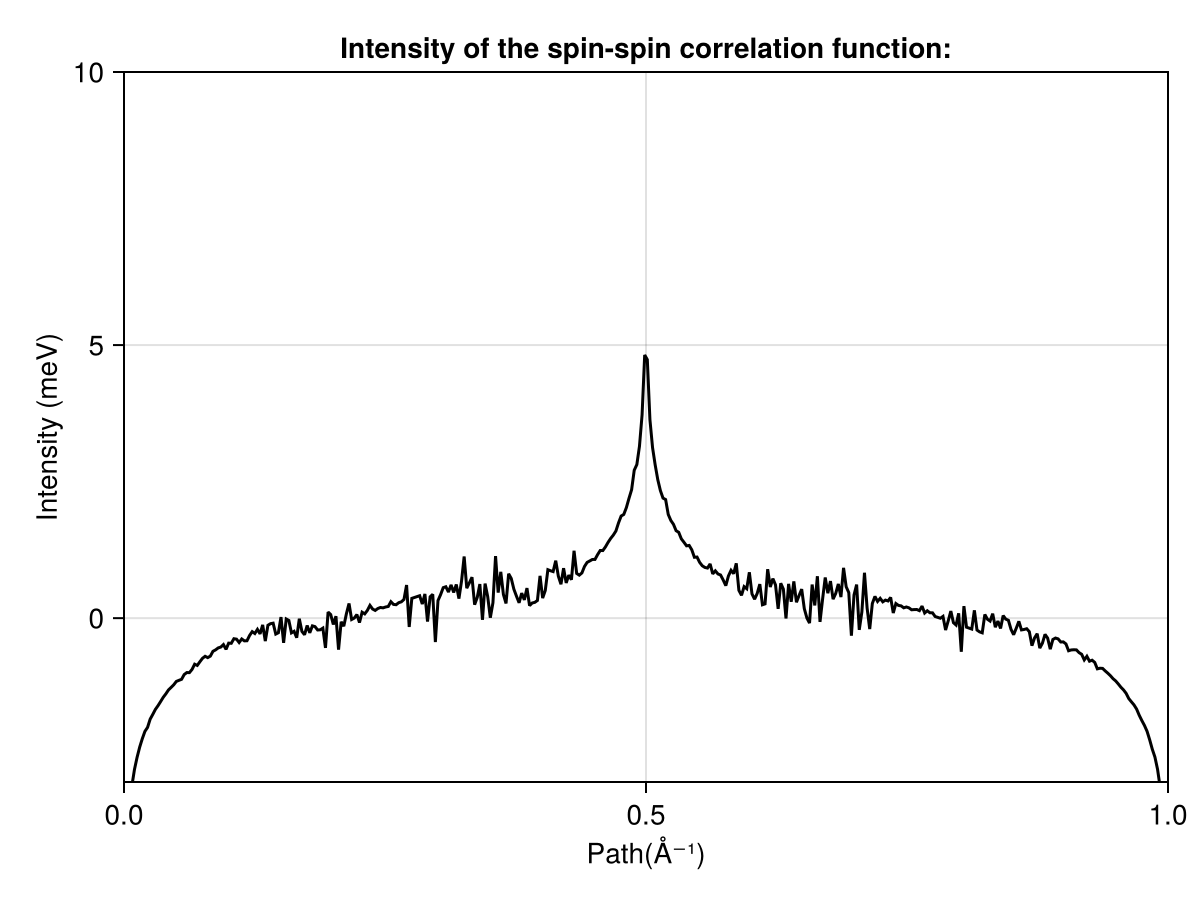

In [13]:
int=log.(res.data[1,:])
fig = Figure()
ax = Axis(fig[1,1]; xlabel="Path(Å⁻¹)", ylabel="Intensity (meV)", title="Intensity of the spin-spin correlation function:")
ylims!(ax, -3, 10)
xlims!(ax, 0, 1)
reciprocalpath=LinRange(0,1,density)
lines!(ax, reciprocalpath, int;color="black")
fig